In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
base_url = "https://www.ikea.com/my/en/cat/coffee-side-tables-10705/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

all_products = []

for page_number in range(1, 6):
    print(f"Fetching page {page_number}...")
    url = f"{base_url}?page={page_number}"

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print("Error or no more pages available.")
        break

    soup = BeautifulSoup(response.text, 'html.parser')

    tables = soup.find_all("div", {"class": "plp-fragment-wrapper"})

    if not tables:
        print("No products found on this page. Stopping.")
        break

    for table in tables:
        try:
            name = table.find("span", {"class": "plp-price-module__product-name"}).text.strip()
            price = table.find("span", {"class": "plp-price__integer"}).text.strip()
            description = table.find("span", {"class": "plp-price-module__description"}).text.strip()

            review_element = table.find("span", {"class": "plp-ratings-label"})
            review = review_element.text.strip() if review_element else None

            types_tag = table.find("p", {"class": "plp-product-badge"})
            types = types_tag.text.strip() if types_tag else None

            status_element = table.find("span", {"class": "plp-commercial-message__title"})
            status = status_element.text.strip() if status_element else None

            link_element = table.find("a", {"class": "plp-product__image-link"})
            link = link_element['href'] if link_element else None

            if link:
                product_response = requests.get(link, headers=headers)
                product_soup = BeautifulSoup(product_response.text, 'html.parser')
                summary_element = product_soup.find('p', class_='pip-product-summary__description')
                summary = summary_element.text.strip() if summary_element else None
                designer_header = product_soup.find('span', class_='pip-product-details__header')
                designer = designer_header.find_next_sibling('p').text.strip() if designer_header else None
                article_number_element = product_soup.find('span', class_='pip-product-identifier__value')
                article_number = article_number_element.text.strip() if article_number_element else None
                size_element = product_soup.find('span', class_='pip-header-section__description-text')
                size = size_element.find_next_sibling('button').text.strip() if size_element and size_element.find_next_sibling('button') else None
            else:
                summary = designer = article_number = size = None

            all_products.append({
                "Name": name,
                "Price": price,
                "Description": description,
                "Review": review,
                "Category": types,
                "Status": status,
                "Summary": summary,
                "Designer": designer,
                "Article Number": article_number,
                "Size": size
            })
        except AttributeError:
            continue

df = pd.DataFrame(all_products)

combined = pd.concat([df.head(5), df.tail(5)])
combined

Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...


,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size
0,LACK,49,"Side table, 55x55 cm",(122),None,None,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55 cm
1,BORGEBY,399,"Coffee table, 70 cm",(22),Top seller,None,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70 cm
2,GLADOM,59,"Tray table, 45x53 cm",(143),Top seller,New\nlower\nprice,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53 cm
3,LACK,99,"Coffee table, 90x55 cm",(96),Top seller,None,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55 cm
4,MOXBODA,199,"Coffee table, 65x45 cm",(6),None,None,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45 cm
115,KVISTBRO,99,"Storage table, 44 cm",(25),None,None,"Store things like throws, cushions or yarn in ...",Francis Cayouette,704.804.02,44 cm
116,LACK,169,"Coffee table, 118x78 cm",(25),None,New\nlower\nprice,LACK table in black-brown is easy to match wit...,IKEA of Sweden,803.529.51,118x78 cm
117,RIAN,69,"Side table, 50x30 cm",(3),None,New\nlower\nprice,The design makes this piece of furniture easy ...,None,604.470.07,50x30 cm
118,JÄTTESTA,399,"Side table, 95x30 cm",(6),None,None,Looking for a stand-out design that creates a ...,Maja Ganszyniec,705.219.16,95x30 cm
119,IDANÄS,"1,299","Coffee table, 107x55 cm",(6),None,None,The IDANÄS series combines timeless design wit...,Francis Cayouette,604.878.71,107x55 cm


In [5]:
df.to_csv("ikea_products_detailed.csv")

In [6]:
ikea_df = pd.read_csv('/content/ikea_products_detailed.csv')

In [ ]:
# To check for null values of each attribute and display the count.
null_counts = ikea_df.isnull().sum()
print("\nNull Value Counts for Each Attribute:")
print(null_counts)


Null Value Counts for Each Attribute:
Unnamed: 0         0
Name               0
Price              0
Description        0
Review             0
Category          90
Status            90
Summary            0
Designer          20
Article Number     0
Size              10
dtype: int64


# **Cleaning data :**

In [7]:
# Change Product Name to lowercase
ikea_df['Name'] = ikea_df['Name'].str.lower()
ikea_df.head(24)

,Unnamed: 0,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size
0,0,lack,49,"Side table, 55x55 cm",(122),NaN,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55 cm
1,1,borgeby,399,"Coffee table, 70 cm",(22),Top seller,NaN,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70 cm
2,2,gladom,59,"Tray table, 45x53 cm",(143),Top seller,New\nlower\nprice,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53 cm
3,3,lack,99,"Coffee table, 90x55 cm",(96),Top seller,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55 cm
4,4,moxboda,199,"Coffee table, 65x45 cm",(6),NaN,NaN,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45 cm
5,5,hol,299,"Storage table, 98x50 cm",(15),Top seller,NaN,The side table has generous storage space unde...,IKEA of Sweden,703.530.22,98x50 cm
6,6,bollsidan,299,"Laptop stand, 68x36 cm",(141),Top seller,NaN,"This sturdy table brings your work, laptop or ...",NaN,605.578.02,68x36 cm
7,7,knarrevik,39,"Bedside table, 37x28 cm",(10),NaN,NaN,This simple black bedside table is a little ge...,IKEA of Sweden,805.763.19,37x28 cm
8,8,nesna,59,"Bedside table, 36x35 cm",(5),NaN,NaN,This beside table with a durable glass top is ...,Jon Karlsson,202.471.28,36x35 cm
9,9,olseröd,149,"Side table, 53x50 cm",(40),NaN,New\nlower\nprice,OLSERÖD is two tables in one. A smart side tab...,Gustav Carlberg,804.820.52,53x50 cm


In [8]:
ikea_df['Description'] = ikea_df['Description'].str.replace(r'\b\d+x\d+(x\d+)?\s?cm|\b\d+x\b|\b\d+\s?cm', '', regex=True)
ikea_df['Description'] = ikea_df['Description'].str.strip()
ikea_df['Description'] = ikea_df['Description'].str.rstrip(',')

ikea_df.head(24)

,Unnamed: 0,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size
0,0,lack,49,Side table,(122),NaN,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55 cm
1,1,borgeby,399,Coffee table,(22),Top seller,NaN,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70 cm
2,2,gladom,59,Tray table,(143),Top seller,New\nlower\nprice,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53 cm
3,3,lack,99,Coffee table,(96),Top seller,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55 cm
4,4,moxboda,199,Coffee table,(6),NaN,NaN,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45 cm
5,5,hol,299,Storage table,(15),Top seller,NaN,The side table has generous storage space unde...,IKEA of Sweden,703.530.22,98x50 cm
6,6,bollsidan,299,Laptop stand,(141),Top seller,NaN,"This sturdy table brings your work, laptop or ...",NaN,605.578.02,68x36 cm
7,7,knarrevik,39,Bedside table,(10),NaN,NaN,This simple black bedside table is a little ge...,IKEA of Sweden,805.763.19,37x28 cm
8,8,nesna,59,Bedside table,(5),NaN,NaN,This beside table with a durable glass top is ...,Jon Karlsson,202.471.28,36x35 cm
9,9,olseröd,149,Side table,(40),NaN,New\nlower\nprice,OLSERÖD is two tables in one. A smart side tab...,Gustav Carlberg,804.820.52,53x50 cm


In [9]:
def categorize_price(price):
    price = float(price.replace(',', ''))

    if price < 100:
        return 'Cheap'
    elif 100 <= price < 500:
        return 'Normal'
    else:
        return 'Expensive'

ikea_df['Price Category'] = ikea_df['Price'].apply(categorize_price)

ikea_df.head(24)

,Unnamed: 0,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size,Price Category
0,0,lack,49,Side table,(122),NaN,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55 cm,Cheap
1,1,borgeby,399,Coffee table,(22),Top seller,NaN,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70 cm,Normal
2,2,gladom,59,Tray table,(143),Top seller,New\nlower\nprice,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53 cm,Cheap
3,3,lack,99,Coffee table,(96),Top seller,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55 cm,Cheap
4,4,moxboda,199,Coffee table,(6),NaN,NaN,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45 cm,Normal
5,5,hol,299,Storage table,(15),Top seller,NaN,The side table has generous storage space unde...,IKEA of Sweden,703.530.22,98x50 cm,Normal
6,6,bollsidan,299,Laptop stand,(141),Top seller,NaN,"This sturdy table brings your work, laptop or ...",NaN,605.578.02,68x36 cm,Normal
7,7,knarrevik,39,Bedside table,(10),NaN,NaN,This simple black bedside table is a little ge...,IKEA of Sweden,805.763.19,37x28 cm,Cheap
8,8,nesna,59,Bedside table,(5),NaN,NaN,This beside table with a durable glass top is ...,Jon Karlsson,202.471.28,36x35 cm,Cheap
9,9,olseröd,149,Side table,(40),NaN,New\nlower\nprice,OLSERÖD is two tables in one. A smart side tab...,Gustav Carlberg,804.820.52,53x50 cm,Normal


In [10]:
ikea_df['Designer'] = ikea_df['Designer'].fillna('Unknown')
ikea_df.head(24)

,Unnamed: 0,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size,Price Category
0,0,lack,49,Side table,(122),NaN,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55 cm,Cheap
1,1,borgeby,399,Coffee table,(22),Top seller,NaN,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70 cm,Normal
2,2,gladom,59,Tray table,(143),Top seller,New\nlower\nprice,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53 cm,Cheap
3,3,lack,99,Coffee table,(96),Top seller,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55 cm,Cheap
4,4,moxboda,199,Coffee table,(6),NaN,NaN,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45 cm,Normal
5,5,hol,299,Storage table,(15),Top seller,NaN,The side table has generous storage space unde...,IKEA of Sweden,703.530.22,98x50 cm,Normal
6,6,bollsidan,299,Laptop stand,(141),Top seller,NaN,"This sturdy table brings your work, laptop or ...",Unknown,605.578.02,68x36 cm,Normal
7,7,knarrevik,39,Bedside table,(10),NaN,NaN,This simple black bedside table is a little ge...,IKEA of Sweden,805.763.19,37x28 cm,Cheap
8,8,nesna,59,Bedside table,(5),NaN,NaN,This beside table with a durable glass top is ...,Jon Karlsson,202.471.28,36x35 cm,Cheap
9,9,olseröd,149,Side table,(40),NaN,New\nlower\nprice,OLSERÖD is two tables in one. A smart side tab...,Gustav Carlberg,804.820.52,53x50 cm,Normal


In [11]:
# Fill null values
ikea_df['Size'] = ikea_df['Size'].fillna('Not Provided')
ikea_df['Size'] = ikea_df['Size'].str.replace(r'cm', '', regex=True)

# Display the updated DataFrame
ikea_df.head(24)

,Unnamed: 0,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size,Price Category
0,0,lack,49,Side table,(122),NaN,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55,Cheap
1,1,borgeby,399,Coffee table,(22),Top seller,NaN,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70,Normal
2,2,gladom,59,Tray table,(143),Top seller,New\nlower\nprice,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53,Cheap
3,3,lack,99,Coffee table,(96),Top seller,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55,Cheap
4,4,moxboda,199,Coffee table,(6),NaN,NaN,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45,Normal
5,5,hol,299,Storage table,(15),Top seller,NaN,The side table has generous storage space unde...,IKEA of Sweden,703.530.22,98x50,Normal
6,6,bollsidan,299,Laptop stand,(141),Top seller,NaN,"This sturdy table brings your work, laptop or ...",Unknown,605.578.02,68x36,Normal
7,7,knarrevik,39,Bedside table,(10),NaN,NaN,This simple black bedside table is a little ge...,IKEA of Sweden,805.763.19,37x28,Cheap
8,8,nesna,59,Bedside table,(5),NaN,NaN,This beside table with a durable glass top is ...,Jon Karlsson,202.471.28,36x35,Cheap
9,9,olseröd,149,Side table,(40),NaN,New\nlower\nprice,OLSERÖD is two tables in one. A smart side tab...,Gustav Carlberg,804.820.52,53x50,Normal


In [12]:
# Replace NaN values in only the 'Category' column using replace
ikea_df['Category'] = ikea_df['Category'].replace(np.nan, "Standard")

ikea_df.head(24)

,Unnamed: 0,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size,Price Category
0,0,lack,49,Side table,(122),Standard,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55,Cheap
1,1,borgeby,399,Coffee table,(22),Top seller,NaN,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70,Normal
2,2,gladom,59,Tray table,(143),Top seller,New\nlower\nprice,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53,Cheap
3,3,lack,99,Coffee table,(96),Top seller,NaN,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55,Cheap
4,4,moxboda,199,Coffee table,(6),Standard,NaN,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45,Normal
5,5,hol,299,Storage table,(15),Top seller,NaN,The side table has generous storage space unde...,IKEA of Sweden,703.530.22,98x50,Normal
6,6,bollsidan,299,Laptop stand,(141),Top seller,NaN,"This sturdy table brings your work, laptop or ...",Unknown,605.578.02,68x36,Normal
7,7,knarrevik,39,Bedside table,(10),Standard,NaN,This simple black bedside table is a little ge...,IKEA of Sweden,805.763.19,37x28,Cheap
8,8,nesna,59,Bedside table,(5),Standard,NaN,This beside table with a durable glass top is ...,Jon Karlsson,202.471.28,36x35,Cheap
9,9,olseröd,149,Side table,(40),Standard,New\nlower\nprice,OLSERÖD is two tables in one. A smart side tab...,Gustav Carlberg,804.820.52,53x50,Normal


In [13]:
ikea_df['Status'] = ikea_df['Status'].replace(np.nan, 'Normal')
ikea_df['Status'] = ikea_df['Status'].str.replace('New\nlower\nprice', 'New lower price')

ikea_df.head(24)

,Unnamed: 0,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size,Price Category
0,0,lack,49,Side table,(122),Standard,Normal,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55,Cheap
1,1,borgeby,399,Coffee table,(22),Top seller,Normal,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70,Normal
2,2,gladom,59,Tray table,(143),Top seller,New lower price,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53,Cheap
3,3,lack,99,Coffee table,(96),Top seller,Normal,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55,Cheap
4,4,moxboda,199,Coffee table,(6),Standard,Normal,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45,Normal
5,5,hol,299,Storage table,(15),Top seller,Normal,The side table has generous storage space unde...,IKEA of Sweden,703.530.22,98x50,Normal
6,6,bollsidan,299,Laptop stand,(141),Top seller,Normal,"This sturdy table brings your work, laptop or ...",Unknown,605.578.02,68x36,Normal
7,7,knarrevik,39,Bedside table,(10),Standard,Normal,This simple black bedside table is a little ge...,IKEA of Sweden,805.763.19,37x28,Cheap
8,8,nesna,59,Bedside table,(5),Standard,Normal,This beside table with a durable glass top is ...,Jon Karlsson,202.471.28,36x35,Cheap
9,9,olseröd,149,Side table,(40),Standard,New lower price,OLSERÖD is two tables in one. A smart side tab...,Gustav Carlberg,804.820.52,53x50,Normal


In [14]:
# 1. Data Cleaning (example: remove parentheses and text)
# Convert the 'Review' column to strings before using .str methods
ikea_df['Review'] = ikea_df['Review'].astype(str).str.replace(r'\(|\)|[a-zA-Z]', '', regex=True)

# 2. Handling Missing Values (example: fill with 0)
ikea_df['Review'] = ikea_df['Review'].fillna(0)

# 3. Conversion to Integer
ikea_df['Review'] = ikea_df['Review'].astype(int)

In [15]:
# Find the maximum review value in the DataFrame.
max_review = ikea_df['Review'].max()

# Define the boundaries for review categories (bins).
bins = [0, 25, max_review]

# Define labels for the review categories.
labels =['Low Review', 'Top Review']

# Categorize reviews based on bins and assign labels.
ikea_df['Review Grade'] = pd.cut(ikea_df['Review'], bins,labels=labels)


In [16]:
combined = pd.concat([ikea_df.head(5), ikea_df.tail(5)])
combined

,Unnamed: 0,Name,Price,Description,Review,Category,Status,Summary,Designer,Article Number,Size,Price Category,Review Grade
0,0,lack,49,Side table,122,Standard,Normal,This LACK table in white is easy to match with...,IKEA of Sweden,104.499.09,55x55,Cheap,Top Review
1,1,borgeby,399,Coffee table,22,Top seller,Normal,Let your eyes rest on BORGEBY table. The styli...,Johanna Jelinek,704.494.02,70,Normal,Low Review
2,2,gladom,59,Tray table,143,Top seller,New lower price,Easy to love at a price that’s hard to resist....,Chenyi Ke,004.119.97,45x53,Cheap,Top Review
3,3,lack,99,Coffee table,96,Top seller,Normal,This LACK table in white is easy to match with...,IKEA of Sweden,704.499.06,90x55,Cheap,Top Review
4,4,moxboda,199,Coffee table,6,Standard,Normal,A coffee table like all the others? Not at all...,IKEA of Sweden,505.430.85,65x45,Normal,Low Review
115,115,kvistbro,99,Storage table,25,Standard,Normal,"Store things like throws, cushions or yarn in ...",Francis Cayouette,704.804.02,44,Cheap,Low Review
116,116,lack,169,Coffee table,25,Standard,New lower price,LACK table in black-brown is easy to match wit...,IKEA of Sweden,803.529.51,118x78,Normal,Low Review
117,117,rian,69,Side table,3,Standard,New lower price,The design makes this piece of furniture easy ...,Unknown,604.470.07,50x30,Cheap,Low Review
118,118,jättesta,399,Side table,6,Standard,Normal,Looking for a stand-out design that creates a ...,Maja Ganszyniec,705.219.16,95x30,Normal,Low Review
119,119,idanäs,"1,299",Coffee table,6,Standard,Normal,The IDANÄS series combines timeless design wit...,Francis Cayouette,604.878.71,107x55,Expensive,Low Review


In [17]:
null_counts = ikea_df.isnull().sum()
print("\nNull Value Counts for Each Attribute:")
print(null_counts)


Null Value Counts for Each Attribute:
Unnamed: 0        0
Name              0
Price             0
Description       0
Review            0
Category          0
Status            0
Summary           0
Designer          0
Article Number    0
Size              0
Price Category    0
Review Grade      0
dtype: int64


# **Visualization :**

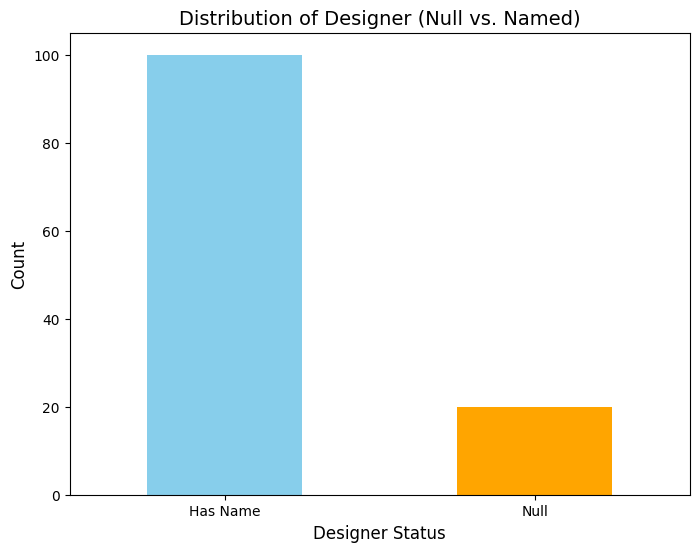

In [18]:
ikea_df['Designer_Status'] = df['Designer'].apply(lambda x: "Null" if x is None else "Has Name")

plt.figure(figsize=(8, 6))
ikea_df['Designer_Status'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

plt.title("Distribution of Designer (Null vs. Named)", fontsize=14)
plt.xlabel("Designer Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Number of Products')

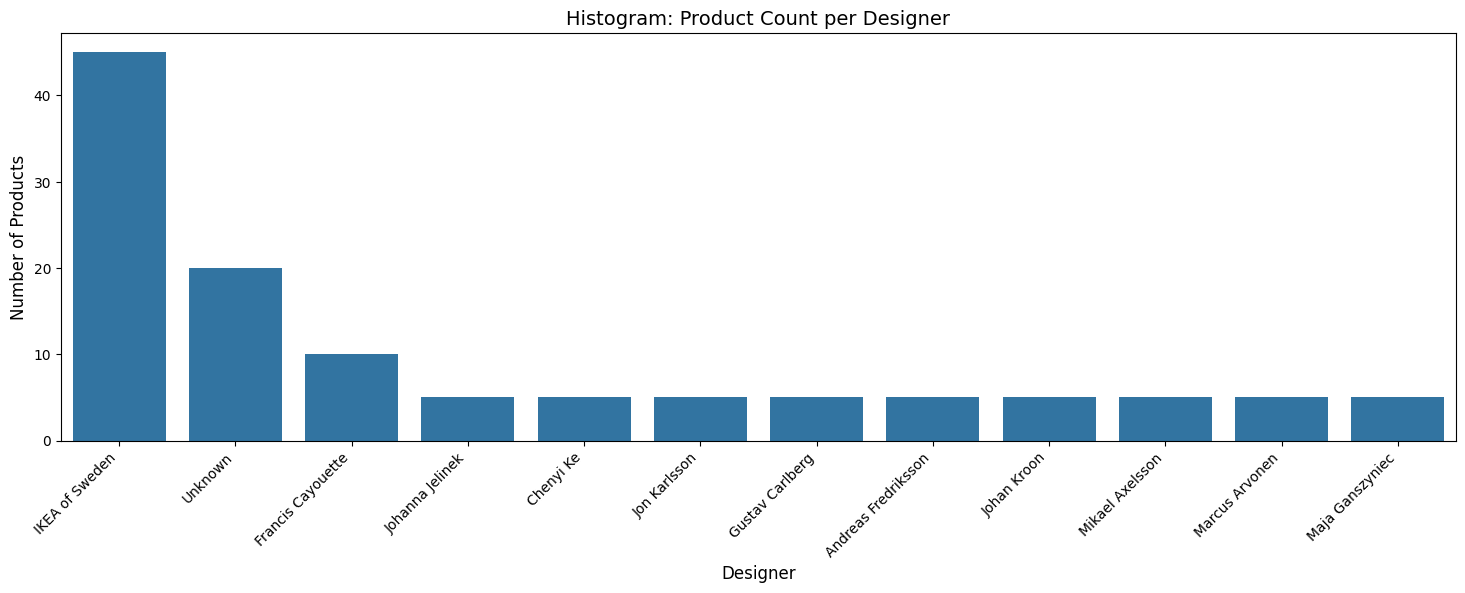

In [19]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 1, 1)
designer_counts = ikea_df['Designer'].value_counts()
sns.barplot(x=designer_counts.index, y=designer_counts.values)
plt.title("Histogram: Product Count per Designer", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Designer", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)

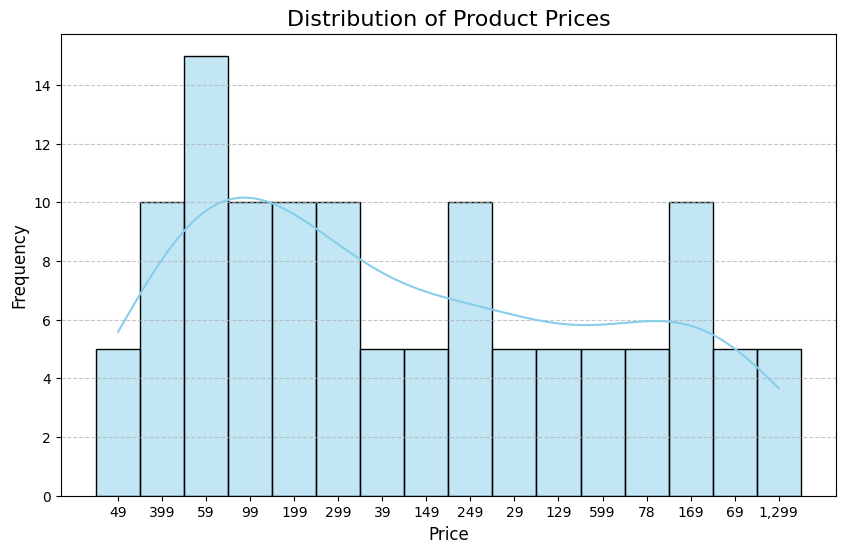

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ikea_df, x='Price', bins=20, kde=True, color='skyblue')

# Add titles and labels to the plot.
plt.title("Distribution of Product Prices", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

<ipython-input-21-a4f0cd1bd4eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ikea_df, x='Price Category', palette='pastel')


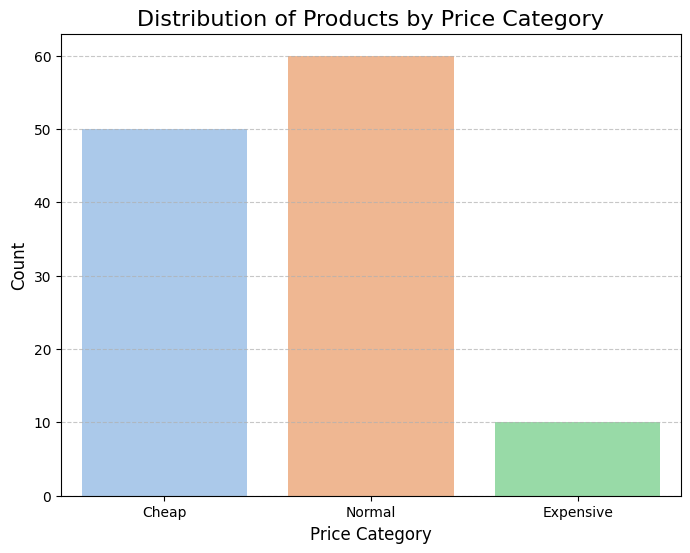

In [21]:
# Create a histogram for Price Category
plt.figure(figsize=(8, 6))
sns.countplot(data=ikea_df, x='Price Category', palette='pastel')

# Add titles and labels
plt.title('Distribution of Products by Price Category', fontsize=16)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

<ipython-input-22-f0c95ba31423>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ikea_df, x='Review Grade', palette='pastel')


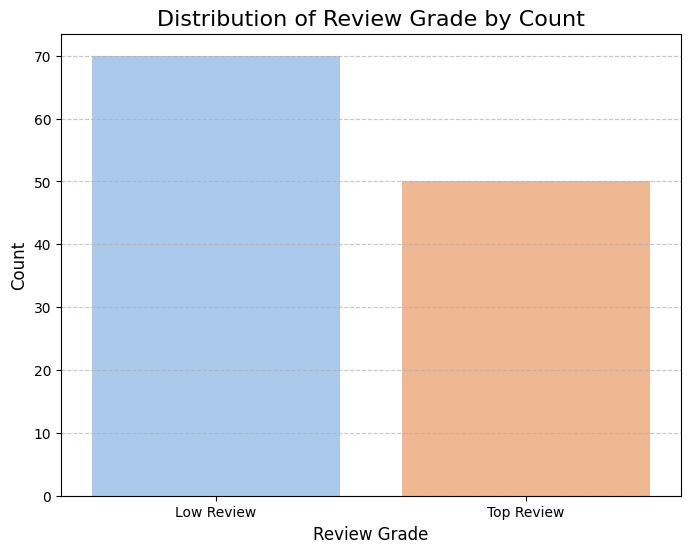

In [22]:

# Create a histogram for Price Category
plt.figure(figsize=(8, 6))
sns.countplot(data=ikea_df, x='Review Grade', palette='pastel')

# Add titles and labels
plt.title('Distribution of Review Grade by Count', fontsize=16)
plt.xlabel('Review Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

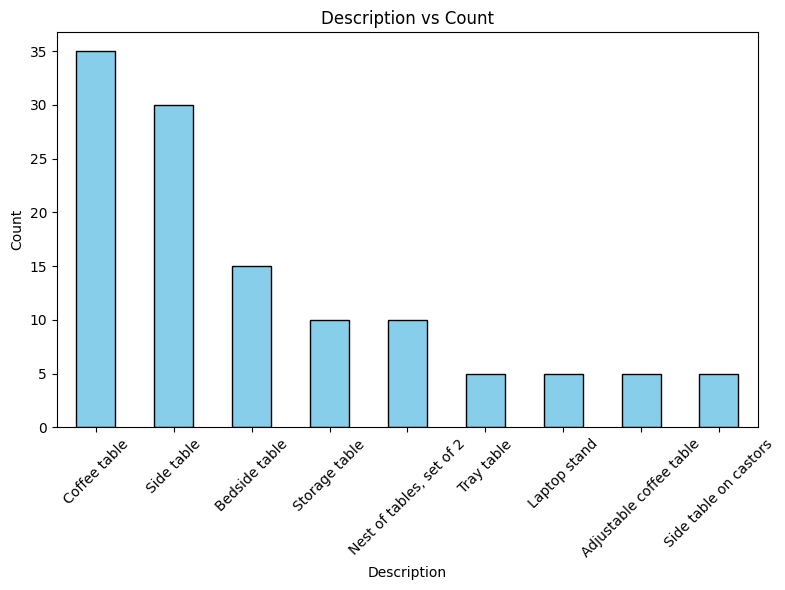

In [25]:
# Create a histogram for Description vs Count
description_counts = ikea_df["Description"].value_counts()

plt.figure(figsize=(8, 6))
description_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Description vs Count')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-41-530bc0120f38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ikea_df, x="Price Category", y="Review", palette="Set3")


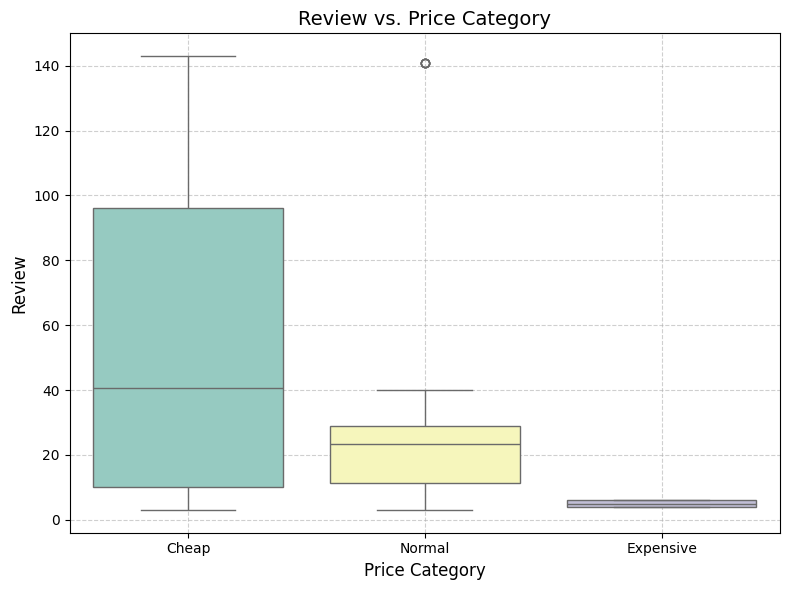

In [41]:
# Plot the boxplot: Review vs. Price Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=ikea_df, x="Price Category", y="Review", palette="Set3")

# Add title and labels
plt.title("Review vs. Price Category", fontsize=14)
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Review", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

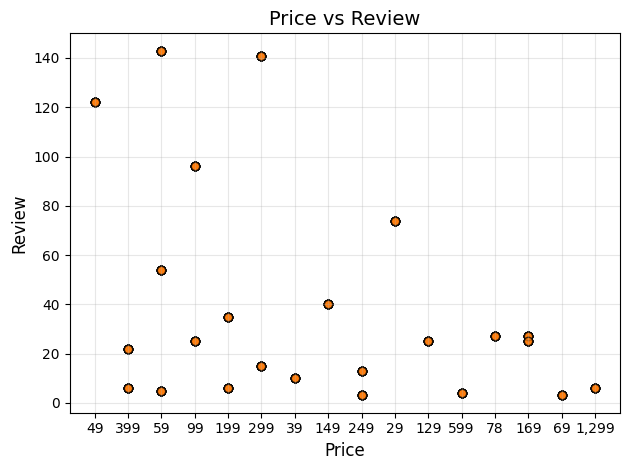

In [44]:
for grade in ikea_df["Review Grade"].unique():
    filtered_data = ikea_df[ikea_df["Review Grade"] == grade]
    plt.scatter(ikea_df["Price"], ikea_df["Review"],
                label=grade, alpha=0.7, edgecolor='black')

plt.title("Price vs Review", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Review", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
ikea_df.to_csv("ikea_cleaned.csv")